# 1. Load Training and Test Data from kaggel site

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('test.csv')

# 2. Not all the Training images have the facial keypoint features
### 2.1 Only 2,140 images have all features (facial keypoint coordinates available)

Training Data Variables and count


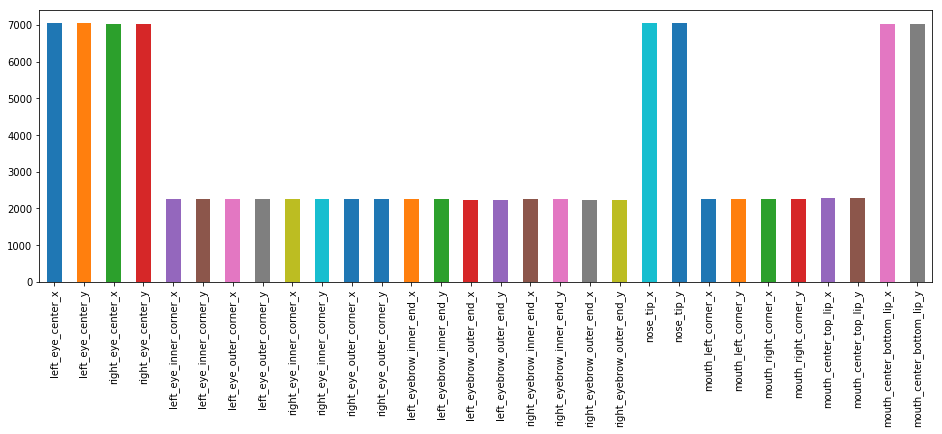

In [377]:
print('Training Data Variables and count')
plt.figure(figsize=(16,5))
train_data.describe().loc['count'].plot.bar()
plt.show()

## 2.2 For baseline analysis, retain only those images that have all keypoint coordinates available in the training data
#### 2.2.1 Also, seperate out the image pixle values from space seperated value to coma seperated array/ list

In [378]:
#Seperate out the image pixle values into a comma seperated array 
train_data['Image'] = test_df['Image'].apply(lambda im: np.fromstring(im, sep=' '))
train_data = train_data.dropna()
train_data = train_data.reset_index(drop=True)

#### 2.2.2 Create a list of all features, one for x and another for y coordinates

In [379]:
#Train data output field
output_field_x = ['left_eye_center_x','right_eye_center_x',
'left_eye_inner_corner_x','left_eye_outer_corner_x','right_eye_inner_corner_x','right_eye_outer_corner_x',
'left_eyebrow_inner_end_x','left_eyebrow_outer_end_x','right_eyebrow_inner_end_x','right_eyebrow_outer_end_x', 
'nose_tip_x',
'mouth_left_corner_x','mouth_right_corner_x','mouth_center_top_lip_x','mouth_center_bottom_lip_x']
output_field_y = ['left_eye_center_y','right_eye_center_y',
'left_eye_inner_corner_y','left_eye_outer_corner_y','right_eye_inner_corner_y','right_eye_outer_corner_y',
'left_eyebrow_inner_end_y','left_eyebrow_outer_end_y','right_eyebrow_inner_end_y','right_eyebrow_outer_end_y', 
'nose_tip_y',
'mouth_left_corner_y','mouth_right_corner_y','mouth_center_top_lip_y','mouth_center_bottom_lip_y']
# Flip data output field
flip_output_field_x = ['right_eye_center_x','left_eye_center_x',
'right_eye_inner_corner_x','right_eye_outer_corner_x','left_eye_inner_corner_x','left_eye_outer_corner_x',
'right_eyebrow_inner_end_x','right_eyebrow_outer_end_x','left_eyebrow_inner_end_x','left_eyebrow_outer_end_x', 
'nose_tip_x',
'mouth_right_corner_x','mouth_left_corner_x','mouth_center_top_lip_x','mouth_center_bottom_lip_x']
flip_output_field_y = ['right_eye_center_y','left_eye_center_y',
'right_eye_inner_corner_y','right_eye_outer_corner_y','left_eye_inner_corner_y','left_eye_outer_corner_y',
'right_eyebrow_inner_end_y','right_eyebrow_outer_end_y','left_eyebrow_inner_end_y','left_eyebrow_outer_end_y', 
'nose_tip_y',
'mouth_right_corner_y','mouth_left_corner_y','mouth_center_top_lip_y','mouth_center_bottom_lip_y']

## 2.3 Since we only 2,140 images for training and testing baseline assumptions, we have created 2,140 more images by simply flipping the image on y-axis

In [380]:
# FLIP TRAINING IMAGES
flip_train_data = train_data.copy()
print(len(flip_train_data))
for x1,x2 in zip(output_field_x,flip_output_field_x):
    flip_train_data[x2] = 96-train_data[x1]
for y1,y2 in zip(output_field_y,flip_output_field_y):
    flip_train_data[y2] = train_data[y1]

flipped_image_list = []
for i in range(len(flip_train_data)):
    flipped_image_list.append(np.flip(flip_train_data['Image'][i].reshape(96,96),1).reshape(96*96))
new_df = pd.DataFrame({'Image': flipped_image_list})
flip_train_data.update(new_df)
flip_train_data.describe().loc[['mean']]

2140


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
mean,66.359731,37.063815,29.778451,36.842274,59.396893,37.920852,73.638383,38.034571,36.727872,37.856014,...,48.047859,57.253926,63.032635,76.134065,32.580924,75.88766,47.918675,72.681125,47.850346,82.630412


Print a sample image from training data


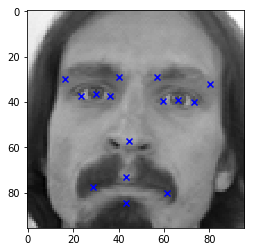

In [381]:
print('Print a sample image from training data')
plt.imshow((train_data['Image'][0]).reshape(96,96),cmap='gray')
for x,y in zip(output_field_x,output_field_y):
    X = train_data[x][0]
    Y = train_data[y][0]
    plt.scatter(X,Y,marker='x',color='blue')
plt.show()

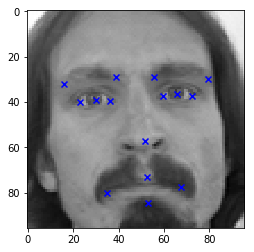

In [382]:
flip_im = flip_train_data['Image'][0].reshape(96,96)
plt.imshow(flip_im,cmap='gray')
for x,y in zip(output_field_x,output_field_y):
    X = 96-train_data[x][0]
    Y = train_data[y][0]
    plt.scatter(X,Y,marker='x',color='blue')
plt.show()

# 3. Split 4,280 training images into 80% Training and 20% Test data

In [434]:
#APPEND AND SHUFFLE TRAINING DATA AND FLIPPED TRAINING DATA
train_data_extended = train_data.append(flip_train_data).sample(frac=1).reset_index(drop=True)
baseline_train = train_data_extended.loc[np.arange(0,int(0.8*len(train_data_extended)))].reset_index(drop=True)
avg_train_x_y = baseline_train.describe().loc[['mean']]
baseline_test = train_data_extended.loc[np.arange(int(0.8*len(train_data_extended)),len(train_data_extended))].reset_index(drop=True)

# 4. We are simply going to take an average of all keypoint cordinates from training data set to be the predicted keypoint cordinates

In [435]:
print('Predicted positions of facial Keypoint cordinates: Average x and y cordinates for each facial keypoint')
avg_train_x_y.transpose()

Predicted positions of facial Keypoint cordinates: Average x and y cordinates for each facial keypoint


,mean
left_eye_center_x,66.271282
left_eye_center_y,36.956203
right_eye_center_x,29.710970
right_eye_center_y,36.968195
left_eye_inner_corner_x,59.326032
left_eye_inner_corner_y,37.887333
left_eye_outer_corner_x,73.508084
left_eye_outer_corner_y,37.843876
right_eye_inner_corner_x,36.667461
right_eye_inner_corner_y,37.898092


# 5. Use the predicted keypoint cordinates to find RMSE through comparison with the actual keypoints from the dev data

In [409]:
import math
SS_dist = []
for i in range(len(baseline_test)):
    L2_dist = []
    for x,y in zip(output_field_x,output_field_y):
        x_dist = (baseline_test[x][i]-avg_train_x_y[x][0])**2
        y_dist = (baseline_test[y][i]-avg_train_x_y[y][0])**2
        L2_dist.append(math.sqrt(x_dist+y_dist))
        
    SS_dist.append(L2_dist)

SS_DF = pd.DataFrame(data=SS_dist,columns=output_field_x)
SS_DF_mean = pd.DataFrame(data=SS_dist,columns=output_field_x).describe().loc[['mean']]
print('Mean pixle distance between the actual and predicted facial keypoints:')
SS_DF_mean.loc['mean']

Mean pixle distance between the actual and predicted facial keypoints:


left_eye_center_x            2.506606
right_eye_center_x           2.498956
left_eye_inner_corner_x      2.311186
left_eye_outer_corner_x      3.137537
right_eye_inner_corner_x     2.327241
right_eye_outer_corner_x     3.106136
left_eyebrow_inner_end_x     3.316486
left_eyebrow_outer_end_x     4.006283
right_eyebrow_inner_end_x    3.358481
right_eyebrow_outer_end_x    4.037626
nose_tip_x                   4.591178
mouth_left_corner_x          4.659162
mouth_right_corner_x         4.629677
mouth_center_top_lip_x       4.722992
mouth_center_bottom_lip_x    4.614435
Name: mean, dtype: float64

In [413]:
SS_DF['RMSE'] = SS_DF.sum(axis = 1, skipna = True)

# 5.1 Images with highest RMSE

In [453]:
print('Top 5 images with highest RMSE')
SS_DF.sort_values(by = ['RMSE'], ascending=False)[0:5]

Top 5 images with highest RMSE


,left_eye_center_x,right_eye_center_x,left_eye_inner_corner_x,left_eye_outer_corner_x,right_eye_inner_corner_x,right_eye_outer_corner_x,left_eyebrow_inner_end_x,left_eyebrow_outer_end_x,right_eyebrow_inner_end_x,right_eyebrow_outer_end_x,nose_tip_x,mouth_left_corner_x,mouth_right_corner_x,mouth_center_top_lip_x,mouth_center_bottom_lip_x,RMSE
852,13.149428,12.797534,10.982282,13.544311,11.662155,13.792127,11.354028,19.595451,11.360414,17.771397,3.985708,4.913000,5.032976,6.101114,4.261165,160.303089
206,11.411052,10.320679,9.993111,12.083916,10.894141,11.168373,13.028803,15.991149,12.451937,15.013689,6.780718,4.427329,4.034095,4.967544,4.699980,147.266517
144,2.722693,12.031677,2.432138,2.548549,10.656556,13.808804,5.482579,5.361538,12.312302,16.284491,8.732873,9.769882,12.916723,7.721294,16.047819,138.829916
373,6.387008,12.760196,4.077147,9.316723,7.547814,17.620460,7.729815,8.661207,4.503684,18.153231,4.122327,6.436223,14.611667,4.586176,11.695906,138.209584
272,8.725134,10.739483,8.893936,8.486725,9.986494,10.363462,8.167359,8.263625,10.915130,10.424295,6.058458,6.570462,7.728676,8.496251,9.131124,132.950616


Print a sample image with highest RMSE
Blue: Actual
Red: Predicted


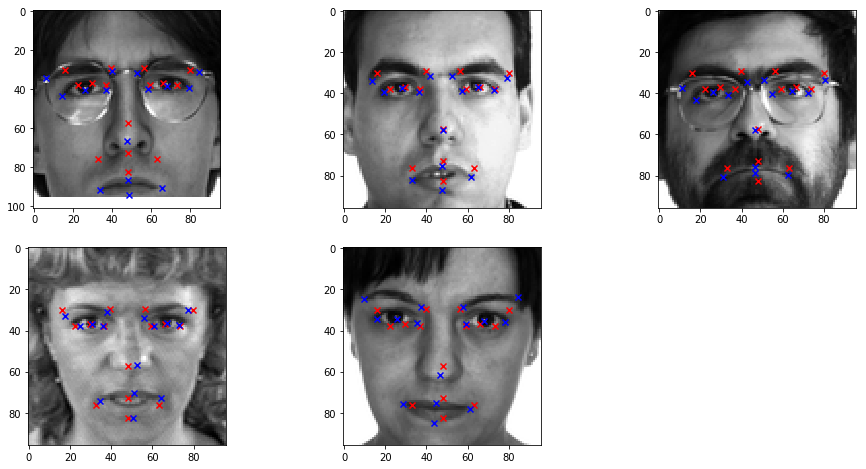

In [454]:
print('Print a sample image with highest RMSE\nBlue: Actual\nRed: Predicted')
plt.figure(figsize=(16,8))
count=0
for i in SS_DF.sort_values(by = ['RMSE'], ascending=False)[0:5].index:
    count=count+1
    plt.subplot(2,3,count)
    plt.imshow((baseline_test['Image'][i]).reshape(96,96),cmap='gray')
    for x,y in zip(output_field_x,output_field_y):
        X1 = avg_train_x_y[x][0]
        Y1 = avg_train_x_y[y][0]
        X2 = baseline_test[x][i]
        Y2 = baseline_test[y][i]
        plt.scatter(X1,Y1,marker='x',color='red')
        plt.scatter(X2,Y2,marker='x',color='blue')
plt.show()

In [426]:
print('Overall RMSE for the Facial keypoint analysis baseline is: '
      +str(round(math.sqrt((SS_DF['RMSE']**2).sum(axis = 0, skipna = True)/len(SS_DF)),2)))

Overall RMSE for the Facial keypoint analysis baseline is: 57.75
